<a href="https://colab.research.google.com/github/IlliaKindratenko/Machine-learning/blob/main/%D0%9B_%D0%A0_2.1_%D0%9A%D1%96%D0%BD%D0%B4%D1%80%D0%B0%D1%82%D0%B5%D0%BD%D0%BA%D0%BE_%D0%86.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Завдання 1. Зчитати датасет ВВП (млн. дол. США) за країнами з Вікіпедії за посиланням.

In [1]:
!pip install pandas

In [2]:
!pip install numpy

In [3]:
import pandas as pd

# Завантажимо таблицю з Вікіпедії
url = 'https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)'
tables = pd.read_html (url)
df = tables[2] # Таблиця, що містить дані про ВВП

# Відображення перших рядків таблиці для перевірки
df.head()

Country/Territory IMF[1][13]            World Bank[14]             \
  Country/Territory   Forecast       Year       Estimate       Year   
0             World  109529216       2024      105435540       2023   
1     United States   28781083       2024       27360935       2023   
2             China   18532633  [n 1]2024       17794782  [n 3]2023   
3           Germany    4591100       2024        4456081       2023   
4             Japan    4110452       2024        4212945       2023   

  United Nations[15]             
            Estimate       Year  
0          100834796       2022  
1           25744100       2022  
2           17963170  [n 1]2022  
3            4076923       2022  
4            4232173       2022

In [4]:
df.columns

MultiIndex([( 'Country/Territory', 'Country/Territory'),
            (        'IMF[1][13]',          'Forecast'),
            (        'IMF[1][13]',              'Year'),
            (    'World Bank[14]',          'Estimate'),
            (    'World Bank[14]',              'Year'),
            ('United Nations[15]',          'Estimate'),
            ('United Nations[15]',              'Year')],
           )

In [5]:
# Зручні назви стовпців
new_columns = [
'Country',
'IMF_Forecast',
'IMF_Year',
'WorldBank_Estimate',
'WorldBank_Year',
'UN_Estimate',
'UN_Year'
]
# Перетворимо MultiIndex на однорівневий індекс з новими назвами
df.columns = new_columns

# Відобразимо перші кілька рядків для перевірки
df.head()

,Country,IMF_Forecast,IMF_Year,WorldBank_Estimate,WorldBank_Year,UN_Estimate,UN_Year
0,World,109529216,2024,105435540,2023,100834796,2022
1,United States,28781083,2024,27360935,2023,25744100,2022
2,China,18532633,[n 1]2024,17794782,[n 3]2023,17963170,[n 1]2022
3,Germany,4591100,2024,4456081,2023,4076923,2022
4,Japan,4110452,2024,4212945,2023,4232173,2022


In [6]:
# Виберемо необхідні стовпці та надамо їм нові назви
selected_columns = {
'IMF_Forecast': 'MVF_2024',
'WorldBank_Estimate': 'WorldBank_2023',
'UN_Estimate': 'OON_2022'
}

df1 = df[['Country'] + list(selected_columns.keys())]

# Перейменуємо стовпці
df = df1.rename(columns=selected_columns)

# Відобразимо перші кілька рядків для перевірки
df. head ()

,Country,MVF_2024,WorldBank_2023,OON_2022
0,World,109529216,105435540,100834796
1,United States,28781083,27360935,25744100
2,China,18532633,17794782,17963170
3,Germany,4591100,4456081,4076923
4,Japan,4110452,4212945,4232173


In [7]:
#Виводимо розмір датасета
df.shape

(210, 4)

In [8]:
#Перевіримо наявність відсутніх значень датасета
df.isnull().sum()

,0
Country,0
MVF_2024,0
WorldBank_2023,0
OON_2022,0


In [9]:
#Виведемо тиаи даних кожного стовпця
print("\nТипи даних кожного стовпця:\n", df.dtypes)


Типи даних кожного стовпця:
 Country           object
MVF_2024          object
WorldBank_2023    object
OON_2022          object
dtype: object


In [11]:
# Замінити всі неперетворювані значення на NaN
df.replace('-', float('nan'), inplace=True)

# Переведемо стовпці у тип float
df['MVF_2024'] = pd.to_numeric(df['MVF_2024'], errors='coerce')
df['WorldBank_2023'] = pd.to_numeric(df['WorldBank_2023'], errors='coerce')
df['OON_2022'] = pd.to_numeric(df['OON_2022'], errors='coerce')

# Виведемо типи даних після конвертації
print("\nТипи даних після конвертації: \n", df.dtypes)

# Відобразимо перші кілька рядків для перевірки
df. head (10)


Типи даних після конвертації: 
 Country            object
MVF_2024          float64
WorldBank_2023    float64
OON_2022          float64
dtype: object


,Country,MVF_2024,WorldBank_2023,OON_2022
0,World,109529216.0,105435540.0,100834796.0
1,United States,28781083.0,27360935.0,25744100.0
2,China,18532633.0,17794782.0,17963170.0
3,Germany,4591100.0,4456081.0,4076923.0
4,Japan,4110452.0,4212945.0,4232173.0
5,India,3937011.0,3549919.0,3465541.0
6,United Kingdom,3495261.0,3340032.0,3089072.0
7,France,3130014.0,3030904.0,2775316.0
8,Brazil,2331391.0,2173666.0,1920095.0
9,Italy,2328028.0,2254851.0,2046952.0


In [12]:
#Перевіримо наявність відсутніх значень датасета
df.isnull().sum()

,0
Country,0
MVF_2024,15
WorldBank_2023,8
OON_2022,1


In [15]:
import numpy as np

#Замініть у таблиці значення "-" на значення NaN
df = df.replace({'-': np.NaN})
#Замініть відсутні дані в стовпцях середніми значеннями цих стовпців (метод fillna)
df = df.drop([0], axis=0)
df = df.fillna(df.mean(numeric_only=True), axis=0)
df.head (5)

,Country,MVF_2024,WorldBank_2023,OON_2022
1,United States,28781083.0,27360935.0,25744100.0
2,China,18532633.0,17794782.0,17963170.0
3,Germany,4591100.0,4456081.0,4076923.0
4,Japan,4110452.0,4212945.0,4232173.0
5,India,3937011.0,3549919.0,3465541.0


In [16]:
#Перевіримо наявність відсутніх значень датасета
df.isnull().sum()

,0
Country,0
MVF_2024,0
WorldBank_2023,0
OON_2022,0


In [17]:
# Обчислення відхилення
df['Deviation'] = df['MVF_2024'] - df['WorldBank_2023']

# Знаходження країн з найбільшим відхиленням
top_countries = df.nlargest(10, 'Deviation')

print(top_countries[['Country', 'MVF_2024', 'WorldBank_2023', 'Deviation']])

                      Country      MVF_2024  WorldBank_2023     Deviation
1               United States  2.878108e+07      27360935.0  1.420148e+06
196  Turks and Caicos Islands  1.123228e+06          1402.0  1.121826e+06
193              Sint Maarten  1.123228e+06          1623.0  1.121605e+06
178                   Curaçao  1.123228e+06          3074.0  1.120154e+06
176                 Greenland  1.123228e+06          3236.0  1.119992e+06
166          French Polynesia  1.123228e+06          5815.0  1.117413e+06
164            Cayman Islands  1.123228e+06          6601.0  1.116627e+06
160             Liechtenstein  1.123228e+06          7365.0  1.115863e+06
161                   Bermuda  1.123228e+06          7828.0  1.115400e+06
158                    Monaco  1.123228e+06          8784.0  1.114444e+06


In [18]:
# Обчислення кореляційної матриці
correlation_matrix = df[['MVF_2024', 'WorldBank_2023', 'OON_2022']].corr()

print("Кореляційна матриця:")
print(correlation_matrix)

# Визначення пар змінних з найвищою кореляцією
# Можемо ігнорувати діагональні значення, які завжди дорівнюють 1
high_correlation = correlation_matrix.unstack().sort_values(ascending=False)
high_correlation = high_correlation[high_correlation < 1]

print("\nПари змінних з найвищою кореляцією:")
print(high_correlation)

Кореляційна матриця:
                MVF_2024  WorldBank_2023  OON_2022
MVF_2024        1.000000        0.993137  0.992032
WorldBank_2023  0.993137        1.000000  0.996336
OON_2022        0.992032        0.996336  1.000000

Пари змінних з найвищою кореляцією:
WorldBank_2023  OON_2022          0.996336
OON_2022        WorldBank_2023    0.996336
MVF_2024        WorldBank_2023    0.993137
WorldBank_2023  MVF_2024          0.993137
MVF_2024        OON_2022          0.992032
OON_2022        MVF_2024          0.992032
dtype: float64


In [19]:
# Обчислення середніх значень для кожного стовпця
mean_values = df[['MVF_2024', 'WorldBank_2023', 'OON_2022']].mean()

print("Середні значення для кожного стовпця:")
print(mean_values)

# Обчислення змін між роками
# Для цього розраховуємо зміну між показниками для кожної пари років

# Створюємо DataFrame для зберігання змін
change_df = pd.DataFrame({
    'Variable': ['MVF_2024', 'WorldBank_2023', 'OON_2022'],
    'Average': mean_values
})

print("\nСередні значення для кожного стовпця:")
print(change_df)

# Обчислюємо зміну між роками
change_df['Change'] = change_df['Average'].diff().fillna(0)

print("\nЗміна середніх значень між роками:")
print(change_df)

Середні значення для кожного стовпця:
MVF_2024          604538.747884
WorldBank_2023    537692.609314
OON_2022          483406.095007
dtype: float64

Середні значення для кожного стовпця:
                      Variable        Average
MVF_2024              MVF_2024  604538.747884
WorldBank_2023  WorldBank_2023  537692.609314
OON_2022              OON_2022  483406.095007

Зміна середніх значень між роками:
                      Variable        Average        Change
MVF_2024              MVF_2024  604538.747884      0.000000
WorldBank_2023  WorldBank_2023  537692.609314 -66846.138570
OON_2022              OON_2022  483406.095007 -54286.514307


In [20]:
# Обчислення стандартного відхилення для кожної країни
df['Std_Dev'] = df[['MVF_2024', 'WorldBank_2023', 'OON_2022']].std(axis=1)

# Знаходження країни з найвищим стандартним відхиленням
most_varied_country = df.loc[df['Std_Dev'].idxmax()]

print("Країна з найвищою варіативністю у показниках:")
print(most_varied_country[['Country', 'Std_Dev']])

Країна з найвищою варіативністю у показниках:
Country     United States
Std_Dev    1519552.648063
Name: 1, dtype: object


In [21]:
# Знаходження країн з найвищими та найнижчими показниками
max_min_values = {
    'MVF_2024': {
        'max_country': df.loc[df['MVF_2024'].idxmax()],
        'min_country': df.loc[df['MVF_2024'].idxmin()]
    },
    'WorldBank_2023': {
        'max_country': df.loc[df['WorldBank_2023'].idxmax()],
        'min_country': df.loc[df['WorldBank_2023'].idxmin()]
    },
    'OON_2022': {
        'max_country': df.loc[df['OON_2022'].idxmax()],
        'min_country': df.loc[df['OON_2022'].idxmin()]
    }
}

# Виведення результатів
for year, countries in max_min_values.items():
    print(f"\n{year}:")
    print(f"Країна з найвищим показником: {countries['max_country']['Country']} ({countries['max_country'][year]})")
    print(f"Країна з найнижчим показником: {countries['min_country']['Country']} ({countries['min_country'][year]})")


MVF_2024:
Країна з найвищим показником: United States (28781083.0)
Країна з найнижчим показником: Tuvalu (66.0)

WorldBank_2023:
Країна з найвищим показником: United States (27360935.0)
Країна з найнижчим показником: Tuvalu (62.0)

OON_2022:
Країна з найвищим показником: United States (25744100.0)
Країна з найнижчим показником: Tuvalu (59.0)


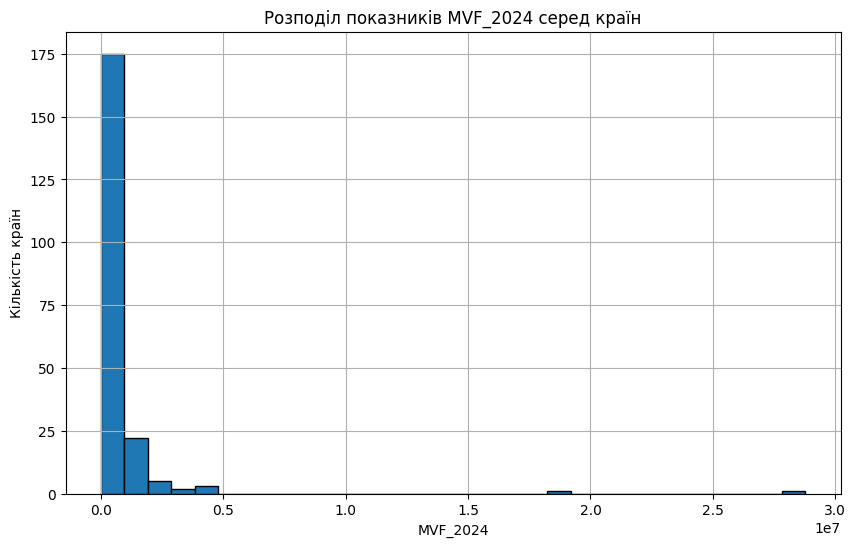


Найвищий показник MVF_2024: 28781083.0
Найнижчий показник MVF_2024: 66.0

Країна з найвищим показником MVF_2024:
1    United States
Name: Country, dtype: object

Країна з найнижчим показником MVF_2024:
209    Tuvalu
Name: Country, dtype: object


In [23]:
import matplotlib.pyplot as plt

# Побудова гістограми
plt.figure(figsize=(10, 6))
plt.hist(df['MVF_2024'], bins=30, edgecolor='black')
plt.title('Розподіл показників MVF_2024 серед країн')
plt.xlabel('MVF_2024')
plt.ylabel('Кількість країн')
plt.grid(True)
plt.show()

# Виявлення країн з крайніми значеннями
max_value = df['MVF_2024'].max()
min_value = df['MVF_2024'].min()
print(f"\nНайвищий показник MVF_2024: {max_value}")
print(f"Найнижчий показник MVF_2024: {min_value}")

# Країни з крайніми значеннями
print("\nКраїна з найвищим показником MVF_2024:")
print(df[df['MVF_2024'] == max_value]['Country'])

print("\nКраїна з найнижчим показником MVF_2024:")
print(df[df['MVF_2024'] == min_value]['Country'])

In [24]:
# Обчислення загальних значень для кожного року
total_MVF_2024 = df['MVF_2024'].sum()
total_WorldBank_2023 = df['WorldBank_2023'].sum()
total_OON_2022 = df['OON_2022'].sum()

# Обчислення частки кожної країни в загальному значенні для кожного року
df['Share_MVF_2024'] = df['MVF_2024'] / total_MVF_2024 * 100
df['Share_WorldBank_2023'] = df['WorldBank_2023'] / total_WorldBank_2023 * 100
df['Share_OON_2022'] = df['OON_2022'] / total_OON_2022 * 100

# Виведення результатів
print("Частка кожної країни в загальному значенні для кожного року (у %):")
print(df[['Country', 'Share_MVF_2024', 'Share_WorldBank_2023', 'Share_OON_2022']])

# Аналіз змін часток країн з часом
df['Change_2024_2023'] = df['Share_MVF_2024'] - df['Share_WorldBank_2023']
df['Change_2023_2022'] = df['Share_WorldBank_2023'] - df['Share_OON_2022']

print("\nЗміна часток країн між 2024 і 2023 роками:")
print(df[['Country', 'Change_2024_2023']].sort_values(by='Change_2024_2023', ascending=False))

print("\nЗміна часток країн між 2023 і 2022 роками:")
print(df[['Country', 'Change_2023_2022']].sort_values(by='Change_2023_2022', ascending=False))

Частка кожної країни в загальному значенні для кожного року (у %):
              Country  Share_MVF_2024  Share_WorldBank_2023  Share_OON_2022
1       United States       22.779107             24.347287       25.481167
2               China       14.667858             15.834790       17.779706
3             Germany        3.633677              3.965270        4.035284
4               Japan        3.253263              3.748914        4.188948
5               India        3.115991              3.158916        3.430146
..                ...             ...                   ...             ...
205          Kiribati        0.000246              0.000248        0.000221
206             Palau        0.000244              0.000234        0.000223
207  Marshall Islands        0.000241              0.000253        0.000276
208             Nauru        0.000127              0.000137        0.000145
209            Tuvalu        0.000052              0.000055        0.000058

[209 rows x 4 column